In [ ]:
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import kagglehub

In [ ]:
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2


In [ ]:
def load_word_vectors():
  print('Loading word vectors ...')
  path = '/root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2/GoogleNews-vectors-negative300.bin'
  word_vectors = KeyedVectors.load_word2vec_format(path, binary = True)
  print('Word vectors loaded ...')
  return word_vectors

In [ ]:
load_word_vectors()

Loading word vectors ...
Word vectors loaded ...


In [ ]:
def get_word_subset(word_vectors, word_list):
  selected_embeddings = []
  selected_words = []
  for word in word_list:
    if word in word_vectors:
      selected_words.append(word)
      selected_embeddings.append(word_vectors[word])
  return np.array(selected_embeddings), selected_words

In [ ]:
def apply_lle(embeddings, n_neighbors=5, n_components=2):
  lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
  reduced_embeddings = lle.fit_transform(embeddings)
  return reduced_embeddings

In [ ]:
def visualize_embeddings(reduced_embeddings, words):
  plt.figure(figsize = (10,8))
  for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i,0], reduced_embeddings[i,1], marker = 'o', color = 'blue')
    plt.text(reduced_embeddings[i,0], reduced_embeddings[i,1], word, fontsize = 12)
  plt.title('LLE semantic word embeddings')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.grid(True)
  plt.show()

Loading word vectors ...
Word vectors loaded ...


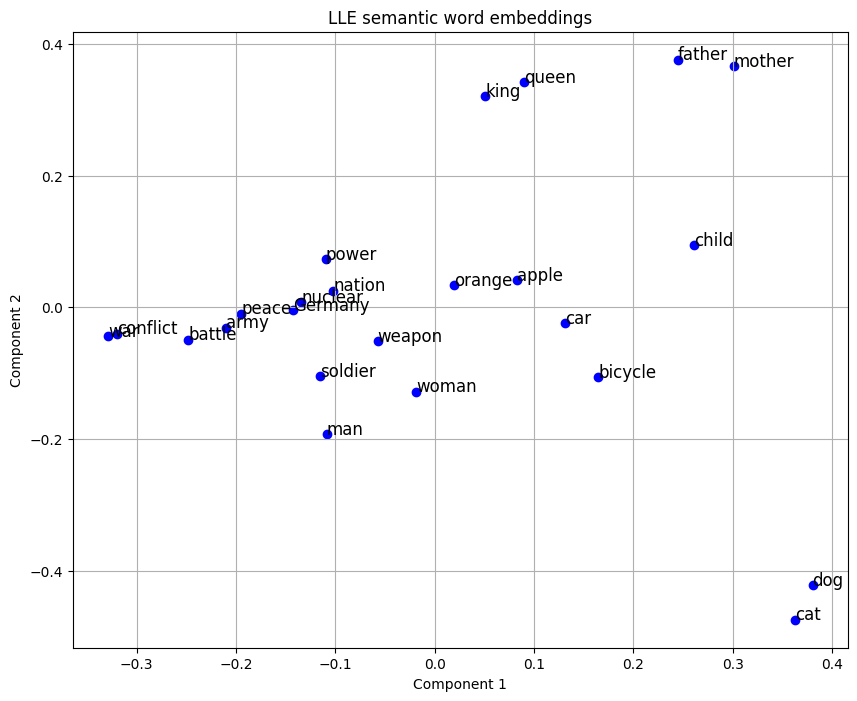

In [ ]:
word_vectors = load_word_vectors()
word_list = ['king', 'queen', 'man', 'woman', 'child', 'father', 'mother', 'dog', 'cat', 'apple', 'orange', 'car', 'bicycle', 'war', 'Germany', 'weapon', 'nuclear', 'peace', 'conflict', 'army', 'soldier', 'battle', 'nation', 'power']
embeddings, selected_words = get_word_subset(word_vectors, word_list)
reduced_embeddings = apply_lle(embeddings)
visualize_embeddings(reduced_embeddings, word_list)